# "On the Spot Recruitment" Challenge

This challenge was part of another recruitment effort. We were presented with 3 options, I chose this one, a 3-way classification problem. We had about an hour to complete the challenge. 

This solution got me through next round of interviews but I did not make the cut eventually. 

I've added commentary here but did not comment much during the session. The organization is neater here too. 

### Problem Statement: 

18 'cranial' measurements are taken. With these measures, we are trying to predict which skull is lurking in the closet.

Skull Types: A, B, C

Here is what we know: 

```[1115, np.nan, 748, 182, np.nan, np.nan, 178, 311, 756, 226, np.nan, np.nan, np.nan, 48, 1009, np.nan, 204, 593]```  

### Summary:

In all, accuracies varied, re-running the script yielded different predictions. Given enough time, I could've explored the data further either through scatterplots or groupings by class for any insight. Multicollinearity could also be a problem here. During the modeling stage, other Classification algorithms could've been tested and optimized through a GridSearch process. 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Imported Data and Inspected for Missing Values

Few missing values, decided to impute. Defaulted to the Median. 

In [2]:
df = pd.read_csv('challenge.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 19 columns):
response    148 non-null object
P1          147 non-null float64
P2          146 non-null float64
P3          147 non-null float64
P4          124 non-null float64
P5          147 non-null float64
P6          148 non-null int64
P7          147 non-null float64
P8          148 non-null int64
P9          147 non-null float64
P10         148 non-null int64
P11         145 non-null float64
P12         137 non-null float64
P13         148 non-null int64
P14         148 non-null int64
P15         136 non-null float64
P16         148 non-null int64
P17         148 non-null int64
P18         148 non-null int64
dtypes: float64(10), int64(8), object(1)
memory usage: 22.0+ KB


In [4]:
medians = []
for column in df.columns:
    if column != 'response':
        df[column] = df[column].fillna(df[column].median())
        medians.append(df[column].median())

Dataset is now complete

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 19 columns):
response    148 non-null object
P1          148 non-null float64
P2          148 non-null float64
P3          148 non-null float64
P4          148 non-null float64
P5          148 non-null float64
P6          148 non-null int64
P7          148 non-null float64
P8          148 non-null int64
P9          148 non-null float64
P10         148 non-null int64
P11         148 non-null float64
P12         148 non-null float64
P13         148 non-null int64
P14         148 non-null int64
P15         148 non-null float64
P16         148 non-null int64
P17         148 non-null int64
P18         148 non-null int64
dtypes: float64(10), int64(8), object(1)
memory usage: 22.0+ KB


Looked at a few variable distrubutions to assess data quality/shape. All are Normally distributed. No clear outliers.

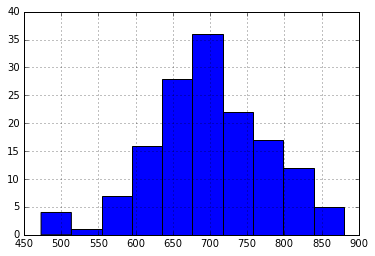

In [6]:
df.P18.hist()

## Defined Explanatory and Response Variables

In [7]:
X = df.iloc[:,1:]
y = df.response

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Began Modeling

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier()
model.fit(X_train,y_train)
yhat = model.predict(X_test)

acc = accuracy_score(y_test,yhat)

labels = ['A','B','C']
conf = confusion_matrix(y_test, yhat,labels)
print ("Accuracy:", acc)
print ("Confusion Matrix:\n",conf)

Accuracy: 0.577777777778
Confusion Matrix:
 [[14  0  1]
 [ 2  4 10]
 [ 4  2  8]]


Decent Accuracy. Nothing stood out amongst explanatory variables. 

In [9]:
model.feature_importances_

array([ 0.03880349,  0.0679266 ,  0.0148161 ,  0.03232708,  0.15187047,
        0.04085575,  0.07179077,  0.03210685,  0.07648649,  0.03389254,
        0.03358553,  0.07414945,  0.04658393,  0.05135086,  0.02226286,
        0.0633526 ,  0.03176549,  0.11607313])

Okay. Let's make a prediction with this Model.

In [10]:
example = [1115, np.nan, 748,182,np.nan,np.nan,178,311,756,226,np.nan,np.nan,np.nan,48,1009,np.nan, 204,593]

example_imp = []
for i in range(0,len(example)):
    if example[i] is np.nan:
        example_imp.append(medians[i])
    else:
        example_imp.append(example[i])

print ("Original:", example)
print ("Imputed:", example_imp) 

prediction = model.predict(np.asarray(example_imp).reshape(1,-1))

print ("Prediction:",prediction)

Original: [1115, nan, 748, 182, nan, nan, 178, 311, 756, 226, nan, nan, nan, 48, 1009, nan, 204, 593]
Imputed: [1115, 1566.5, 748, 182, 669.0, 233.5, 178, 311, 756, 226, 268.0, 650.0, 125.0, 48, 1009, 138.0, 204, 593]
Prediction: ['C']


## Tried SGDClassifier to see if Accuracy could be improved

In [11]:
X = df.iloc[:,1:]
y = df.response

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SGDClassifier(loss = 'hinge', alpha = 0.0001, penalty='l2') #varied params. on-the spot, not much difference
model.fit(X_train,y_train)
yhat = model.predict(X_test)

acc = accuracy_score(y_test,yhat)

labels = ['A','B','C']
conf = confusion_matrix(y_test,yhat,labels)
print ("Accuracy:", acc)
print ("Confusion Matrix:\n",conf)

Accuracy: 0.711111111111
Confusion Matrix:
 [[10  0  1]
 [ 0 11  6]
 [ 2  4 11]]


In [13]:
example = [1115, np.nan, 748,182,np.nan,np.nan,178,311,756,226,np.nan,np.nan,np.nan,48,1009,np.nan, 204,593]

example_imp = []
for i in range(0,len(example)):
    if example[i] is np.nan:
        example_imp.append(medians[i])
    else:
        example_imp.append(example[i])

print ("Original:", example)
print ("Imputed:", example_imp) 

prediction = model.predict(np.asarray(example_imp).reshape(1,-1))

print ("Prediction:",prediction)

Original: [1115, nan, 748, 182, nan, nan, 178, 311, 756, 226, nan, nan, nan, 48, 1009, nan, 204, 593]
Imputed: [1115, 1566.5, 748, 182, 669.0, 233.5, 178, 311, 756, 226, 268.0, 650.0, 125.0, 48, 1009, 138.0, 204, 593]
Prediction: ['C']
